# Capstone Project - The Battle of Neighborhoods

## *Background Of The Project*

*In this capstone project we are going to use what we learnt from our course and creatively to come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve.<br>
We need to make sure to provide sufficient justification of why you think what you want to do or solve is important and why would a client or a group of people be interested in your project.<br>
My project <strong>Impact</strong> is to set to resolve one of the most important <strong>social issue, neighborhood crime, which is co-relate with its neighborhood resources</strong>.*

### *The Problem*

*A neighborhood can be defined as "A district or area with distinctive characteristics". <br>This research paper https://pubmed.ncbi.nlm.nih.gov/22830936/ suggest that socio-demographic characteristics of neighborhoods and neighborhood processes are both predictive of crime and safety. Further, some neighborhood conditions may affect crime and safety in unexpected ways.<br>Neighborhood institutional resource models also suggest, whereby neighborhood resources are believed to affect children and adolescents through access to resources such as parks and libraries, as well as community service centers that promote positive, healthy development. 
<br>This lead to the problem statement, <strong>“how we could create a better neighborhood by creating a better neighborhood resources in fighting the crime?”</strong>*  

### *The Target Audience*

*This project is to help the <strong>government</strong> for future city planning and also to improve the neighborhood resources with high neighborhood crime area.<br>
This project is also to helping the <strong>business opportunist and nonprofit organization</strong> to understand how they can create a better neighborhood by creating their business model that could help in creating positive impact to the neighborhood.*


### *How We Solve It?*

*My project is to create a platform to help in identify what are the positive neighborhood resources and venues that could results a low crime rate neighborhood and what are the negative neighborhood resources and venues that results a high crime rate neighborhood. <br>I am also going to use the <strong>unsupervised learning</strong> to detect the pattern of the <strong>neighborhood resources and venues with its crime rate</strong>. By understanding the top 10 positive and negative neighborhood resources and venues based on the pattern, we could <strong>create hypothesis to test the assumption.</strong><br>If the hypothesis shown that the positive neighborhood resources and venues could help in reducing the crime rate, this model could be used by government for future city planning and also to improve the neighborhood resources with high neighborhood crime area. Lowering the crime rate will helps in driving the business to invest into the neighborhood and this will also resolve the neighborhood poverty.* 

## *How Should We Start?*

### *The Data*

*We are going to start the journey with collecting the data that is available online, these are the dataset that we are going to be used in this project.*
<br>

<strong><em>Neighborhood Crime Data</em></strong>
<br> 
*Crime in Baltimore<br>
Dataset in Kaggle : https://www.kaggle.com/sohier/crime-in-baltimore<br>
How we use the Dataset : We are going to use this dataset to identify the neighborhood crimes, total number of crimes and in which neighborhood of the crimes that is happened<br>
Dataset Information : 40MB, CSV format, 15 columns*
<br>


<strong><em>Neighborhood Resources & Venues Data</em></strong>
<br> 
*Dataset from FourSquare API<br> 
How we use the Dataset : We are going to use this dataset to identify the neighborhood Resources & Venues Data. We will explore and understand the top 10 actors from this dataset<br>
Dataset Information : REST API*
<br> 

*The dataset collected will be used for identifying patterns in between the Crime in Baltimore VS Neighborhood Resources & Venues
The unsupervised learning will group all the similiar Neighborhood Resources & Venues for the highest crime neighborhood and lowest crime neighborhood
We will analyze the differences between these 2 neighborhoods*
<br> 

## *Methology*

*In this section we will be using some of the techniques from our data science course to achieving our results and to answer the key question for our problem statement <strong>“how we could create a better neighborhood by creating a better neighborhood resources in fighting the crime?”</strong>* <br>
*First, We need to wranggle and to prepare our data for our analysis and exploration steps, then we will be using the unsupervised Learning to understand the pattern from our analysis. We will be solving our hyphothesis based on the data and results from our learning*

## *Download Dataset*
*We need to download all the dataset from the data source for all the analysis and hyphothesis that need to be perform. In this project, we need to download "Crime in Baltimore" dataset from kaggle and transform it into a DataFrame.*

In [25]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
# HIDDEN
# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_84f35cb02c234512abc56cb93734a970 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_84f35cb02c234512abc56cb93734a970 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_84f35cb02c234512abc56cb93734a970 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='WuHMUtfqXrybSk9bfeETGudRgBcVqbhN0YdzkhuAKZaq',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_84f35cb02c234512abc56cb93734a970)

body = client_84f35cb02c234512abc56cb93734a970.get_object(Bucket='capstoneprojectthebattleofneighbo-donotdelete-pr-1epijxx922wtlm',Key='BPD_Part_1_Victim_Based_Crime_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


## *Data Preparation*

*We need to ensure we have quality dataset to getting the best results for our analysis and hyphothesis test. We need to pre-processing the data before using it for our analysis and hyphothesis test.<br>
These are the steps to pre-processing our dataset:-*
 + *Select the only columns that we need*
 + *Deal with missing data*
 + *Correct Data format*
 + *Data standardization*
 + *Data Normalization*
 + *Binning*

#### *Select the only columns that we need*
*We do not include all the columns that is not related to our analysis, hence, we are only selecting those features that are co-relate with our analysis. In this project, we only required the following for our neighborhood crime rate analysis.*
 + *Description*
 + *District*
 + *Neighborhood*
 + *Longitude*
 + *Latitude*
 + *Total Incidents*

In [2]:
#Subset the columns that we required for the analysis
df_baltimore_crime = df_data_1[['Description', 'District', 'Neighborhood', 'Longitude','Latitude', 'Total Incidents']]
df_baltimore_crime.head()

,Description,District,Neighborhood,Longitude,Latitude,Total Incidents
0,ROBBERY - RESIDENCE,SOUTHERN,Brooklyn,-76.60541,39.22951,1
1,AUTO THEFT,CENTRAL,Reservoir Hill,-76.63217,39.31360,1
2,SHOOTING,NORTHERN,Winston-Govans,-76.60697,39.34768,1
3,AGG. ASSAULT,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,1
4,COMMON ASSAULT,CENTRAL,Downtown West,-76.61365,39.28756,1


#### *Deal with missing data*
*We need to undertand how much impact of the data are NULL or NA to our dataset, this is to define our startegy wether we are going to drop the data or using mean of the dataset or using the most common values of the dataset and etc. In this project, we are droping all the null or na rows due to the impact to the dataset is low*

In [3]:
#analyzing the null data distribution
print(df_baltimore_crime.isna().sum()/len(df_baltimore_crime)*100)

#drop all the null rows
df_baltimore_crime_final = df_baltimore_crime.dropna()
print('{}%, rows removed'.format(round((df_baltimore_crime.shape[0] - df_baltimore_crime_final.shape[0])/df_baltimore_crime.shape[0]*100),2))

#check for null data
print('Missing Values\n{}'.format(df_baltimore_crime_final.isna().sum(), '\n'))

Description        0.000000
District           0.028930
Neighborhood       0.990854
Longitude          0.797023
Latitude           0.797023
Total Incidents    0.000000
dtype: float64
1%, rows removed
Missing Values
Description        0
District           0
Neighborhood       0
Longitude          0
Latitude           0
Total Incidents    0
dtype: int64


#### *Correct data format*
*We need to ensure there are correct data format in the dataset to avaid code errors for later analysis process, example: date, time, and etc*

In [4]:
#Correct Data Format
print('Data Type\n{}'.format(df_baltimore_crime_final.dtypes))

Data Type
Description         object
District            object
Neighborhood        object
Longitude          float64
Latitude           float64
Total Incidents      int64
dtype: object


*We do not perform the Data standardization, Data Normalization and Binning as this is not required in our dataset. Now, the <strong>dataset is ready</strong> for analysis and hyphothesis test purposes. This is the final dataset for Baltimore Crime Rate*

In [5]:
print(df_baltimore_crime_final.shape)
df_baltimore_crime_final.head()

(273789, 6)


,Description,District,Neighborhood,Longitude,Latitude,Total Incidents
0,ROBBERY - RESIDENCE,SOUTHERN,Brooklyn,-76.60541,39.22951,1
1,AUTO THEFT,CENTRAL,Reservoir Hill,-76.63217,39.31360,1
2,SHOOTING,NORTHERN,Winston-Govans,-76.60697,39.34768,1
3,AGG. ASSAULT,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,1
4,COMMON ASSAULT,CENTRAL,Downtown West,-76.61365,39.28756,1


## *Explore the Dataset*

### *Question to Explore : The highest crime District? VS The lowest crime District?*
*The method to define the highest crime district versus the lowest crime district is based on the number of neighborhood against the total crime commited. We cannot compare just to total crime commited as some of the district have more neighborhood, hence, its contribute to a higher crime rate. We are using the total crime devide by the number of district to calulate the crime rate. The results is average crime commited per district. We will then taking the highest and the lowest for our later hyphothesis test.*

In [6]:
#Subset all districts and set them into total incidents count (each district with total incidents)
df_baltimore_crime_final_district = df_baltimore_crime_final.groupby(['District']).count().sort_values(by='Total Incidents', ascending=False).reset_index()
df_baltimore_crime_final_district

#Perform calculation for average crime commited per district 
for i in range(len(df_baltimore_crime_final_district['District'])):
  dname = df_baltimore_crime_final_district['District'][i]
  df_baltimore_crime_final_dname = df_baltimore_crime_final[df_baltimore_crime_final['District'] == dname]
  df_baltimore_crime_final_neighborhood = df_baltimore_crime_final_dname.groupby(['Neighborhood']).count().reset_index()
  print('{}, {} crimes committed per district, {} Neighborhood'.format(dname, round(df_baltimore_crime_final_district['Total Incidents'][i]/df_baltimore_crime_final_neighborhood.shape[0]), df_baltimore_crime_final_neighborhood.shape[0]))
 

NORTHEASTERN, 905.0 crimes committed per district, 47 Neighborhood
SOUTHEASTERN, 1083.0 crimes committed per district, 35 Neighborhood
SOUTHERN, 928.0 crimes committed per district, 34 Neighborhood
CENTRAL, 1208.0 crimes committed per district, 26 Neighborhood
NORTHERN, 440.0 crimes committed per district, 71 Neighborhood
NORTHWESTERN, 618.0 crimes committed per district, 45 Neighborhood
SOUTHWESTERN, 561.0 crimes committed per district, 46 Neighborhood
EASTERN, 757.0 crimes committed per district, 31 Neighborhood
WESTERN, 816.0 crimes committed per district, 27 Neighborhood


### *In Conclusion :*
 + *Highest Crime District : CENTRAL, 1208.0 crimes committed per district*
 + *Lowest Crime District : WESTERN, 816.0 crimes committed per district*
<br>*Both of the district numbers are 26 VS 27*    
*These are the 2 dataset we will be using for our further analysis against the neighborhood venues*

### *Question to Explore : What are the venues around these neighborhood?*
*We are going to explore the neighborhood venues by using Central and Western district as our hyphothesis test. We will be using the FourSquare API and to use the district geolocation to explore the neighborhood venues.*

#### *Extract Geolocation for Central districts*

In [7]:
#subset the central district dataset
df_baltimore_crime_final_central = df_baltimore_crime_final[df_baltimore_crime_final['District'] == 'CENTRAL']
df_baltimore_crime_final_cn = df_baltimore_crime_final_central.groupby(['Neighborhood']).count().reset_index()
df_baltimore_crime_final_cn_tolinc = df_baltimore_crime_final_cn.drop(columns=['Description','District','Longitude','Latitude'])
print(df_baltimore_crime_final_cn.shape)

#Geolocation for Central districts
!pip install geocoder
import geocoder
central_district_geo = pd.DataFrame(columns=['Neighborhood', 'Longitude', 'Latitude'])

for code in df_baltimore_crime_final_cn['Neighborhood']:
    g = geocoder.arcgis('{}, Baltimore, Maryland'.format(code))
    print(code, g.latlng)
    while (g.latlng is None):
        g = geocoder.arcgis('{}, Baltimore, Maryland'.format(code))
        print(code, g.latlng)
    latlng = g.latlng
    central_district_geo = central_district_geo.append({"Neighborhood":code, "Longitude":latlng[1], "Latitude":latlng[0]}, ignore_index=True)
    
central_district_geo.head()

(26, 6)
Barclay [39.31520000000006, -76.61265999999995]
Bolton Hill [39.30832000000004, -76.62612999999999]
Charles North [39.309780000000046, -76.61658999999997]
Downtown [39.29231000000004, -76.61509999999998]
Downtown West [39.29231000000004, -76.61509999999998]
Druid Heights [39.307300000000055, -76.63560999999999]
Federal Hill [39.27983000000006, -76.60857999999996]
Greenmount West [39.30876000000006, -76.60912999999994]
Heritage Crossing [39.29696000000007, -76.62831999999997]
Inner Harbor [39.28783000000004, -76.61079999999998]
Johnston Square [39.30334000000005, -76.60777999999993]
Jones Falls Area [39.39698752389265, -76.66579514276961]
Jonestown [39.29131000000007, -76.60411999999997]
Madison Park [39.304310000000044, -76.62848999999994]
Mid-Town Belvedere [39.30236000000008, -76.61607999999995]
Mount Vernon [39.29920000000004, -76.61354999999998]
Otterbein [39.28293000000008, -76.61594999999994]
Penn North [39.31144000000006, -76.64410999999996]
Penn-Fallsway [39.29646000000

,Neighborhood,Longitude,Latitude
0,Barclay,-76.61266,39.31520
1,Bolton Hill,-76.62613,39.30832
2,Charles North,-76.61659,39.30978
3,Downtown,-76.61510,39.29231
4,Downtown West,-76.61510,39.29231


#### *Extract Geolocation for Western districts*

In [8]:
#subset the western district dataset
df_baltimore_crime_final_western = df_baltimore_crime_final[df_baltimore_crime_final['District'] == 'WESTERN']
df_baltimore_crime_final_wn = df_baltimore_crime_final_western.groupby(['Neighborhood']).count().reset_index()
df_baltimore_crime_final_wn_tolinc = df_baltimore_crime_final_wn.drop(columns=['Description','District','Longitude','Latitude'])
print(df_baltimore_crime_final_wn.shape)

#Geolocation for Central districts
#!pip install geocoder
import geocoder
western_district_geo = pd.DataFrame(columns=['Neighborhood', 'Longitude', 'Latitude'])

for code in df_baltimore_crime_final_wn['Neighborhood']:
    g = geocoder.arcgis('{}, Baltimore, Maryland'.format(code))
    print(code, g.latlng)
    while (g.latlng is None):
        g = geocoder.arcgis('{}, Baltimore, Maryland'.format(code))
        print(code, g.latlng)
    latlng = g.latlng
    western_district_geo = western_district_geo.append({"Neighborhood":code, "Longitude":latlng[1], "Latitude":latlng[0]}, ignore_index=True)
    
western_district_geo.head()

(27, 6)
Boyd-Booth [39.28726000000006, -76.65000999999995]
Bridgeview/Greenlawn [39.30114000000003, -76.65512999999999]
Coppin Heights/Ash-Co-Eas [39.306940000000054, -76.65706999999998]
Druid Heights [39.307300000000055, -76.63560999999999]
Easterwood [39.30778000000004, -76.65046999999998]
Evergreen Lawn [39.296560000000056, -76.65641999999997]
Franklin Square [39.291090000000054, -76.64181999999994]
Harlem Park [39.29678000000007, -76.63859999999994]
Heritage Crossing [39.29696000000007, -76.62831999999997]
Hollins Market [39.287510000000054, -76.63592699999998]
Midtown-Edmondson [39.296620000000075, -76.64912999999996]
Mondawmin [39.31575000000004, -76.65401999999995]
Mosher [39.29816000000005, -76.66221999999993]
Northwest Community Actio [39.30597000000006, -76.66504999999995]
Panway/Braddish Avenue [39.29889396700357, -76.65978226194865]
Parkview/Woodbrook [39.31653000000006, -76.64838999999995]
Penn North [39.31144000000006, -76.64410999999996]
Penrose/Fayette Street Ou [39.294

,Neighborhood,Longitude,Latitude
0,Boyd-Booth,-76.65001,39.28726
1,Bridgeview/Greenlawn,-76.65513,39.30114
2,Coppin Heights/Ash-Co-Eas,-76.65707,39.30694
3,Druid Heights,-76.63561,39.30730
4,Easterwood,-76.65047,39.30778


#### *Establish API connection with FourSquare API*

In [24]:
# HIDDEN
# @hidden_cell
#Access to FourSquare
CLIENT_ID = 'EEET2M2W1HLBWBZCCZIJS5NB1CU2FHNH4COVN1WTLXHKEYR3' # your Foursquare ID
CLIENT_SECRET = 'RT2RRRB11RERUGX1MV2LMXL5AUVQKLQIYC2WFGYGACUOI1RQ' # your Foursquare Secret
ACCESS_TOKEN = 'TIP1EUPKMEZPC1EMRHHRUSHAAA3EE2JTUR4GVE4WXSE2X5JS' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 300
print('Connection Successful')

Connection Successful


#### *Function to extract venues information from JSON*

In [10]:
#Create a function to get nearby Venues with Neighborhood name
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        query_results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in query_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### *Let's Exploring Venues within the Neighborhood within radius of 800m for Central District*

In [11]:
import requests
import json
from pandas.io.json import json_normalize

NName = central_district_geo['Neighborhood']
NLat = central_district_geo['Latitude']
NLong = central_district_geo['Longitude']
central_neighborhood_venues = getNearbyVenues(names=NName, latitudes=NLat, longitudes=NLong, radius=800)
print(central_neighborhood_venues.shape)
central_neighborhood_venues.head()

Barclay
Bolton Hill
Charles North
Downtown
Downtown West
Druid Heights
Federal Hill
Greenmount West
Heritage Crossing
Inner Harbor
Johnston Square
Jones Falls Area
Jonestown
Madison Park
Mid-Town Belvedere
Mount Vernon
Otterbein
Penn North
Penn-Fallsway
Poppleton
Reservoir Hill
Ridgely's Delight
Seton Hill
Stadium Area
University Of Maryland
Upton
(1518, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barclay,39.3152,-76.61266,Grind House Juice Bar,39.317515,-76.615295,Juice Bar
1,Barclay,39.3152,-76.61266,Brown Rice Korean Grill - N Charles,39.316494,-76.616977,Korean Restaurant
2,Barclay,39.3152,-76.61266,Fadensonnen,39.315143,-76.617214,Sake Bar
3,Barclay,39.3152,-76.61266,Baltimore Eagle,39.313039,-76.616932,Gay Bar
4,Barclay,39.3152,-76.61266,iBar,39.313771,-76.618151,Sports Bar


#### *Let's Exploring Venues within the Neighborhood within radius of 800m for Western District*

In [12]:
NName = western_district_geo['Neighborhood']
NLat = western_district_geo['Latitude']
NLong = western_district_geo['Longitude']
western_neighborhood_venues = getNearbyVenues(names=NName, latitudes=NLat, longitudes=NLong, radius=800)
print(western_neighborhood_venues.shape)
western_neighborhood_venues.tail()

Boyd-Booth
Bridgeview/Greenlawn
Coppin Heights/Ash-Co-Eas
Druid Heights
Easterwood
Evergreen Lawn
Franklin Square
Harlem Park
Heritage Crossing
Hollins Market
Midtown-Edmondson
Mondawmin
Mosher
Northwest Community Actio
Panway/Braddish Avenue
Parkview/Woodbrook
Penn North
Penrose/Fayette Street Ou
Poppleton
Reservoir Hill
Rosemont Homeowners/Tenan
Sandtown-Winchester
Shipley Hill
Union Square
University Of Maryland
Upton
Walbrook
(556, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
551,Walbrook,39.3089,-76.67139,Hood Mart,39.308739,-76.670452,American Restaurant
552,Walbrook,39.3089,-76.67139,Pizza Boli's,39.308612,-76.669435,Pizza Place
553,Walbrook,39.3089,-76.67139,Rite Aid,39.310396,-76.675669,Drugstore
554,Walbrook,39.3089,-76.67139,ACE,39.310680,-76.675231,Check Cashing Service
555,Walbrook,39.3089,-76.67139,Chicken Lake Trout,39.314231,-76.673201,Breakfast Spot


### *In Conclusion :*
 + *Total Venues For CENTRAL District : 1518*
 + *Total Venues For WESTERN District : 556*

### *Question to Explore : How easy these venues can be accessible and what are top 10 venues?*

#### *Let's Exploring Heatmap of the Venue Categories for Central District*

In [13]:
# one hot encoding
central_crime_venues_transform = pd.get_dummies(central_neighborhood_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
central_crime_venues_transform['Neighborhood'] = central_neighborhood_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [central_crime_venues_transform.columns[-1]] + list(central_crime_venues_transform.columns[:-1])
central_crime_venues_transform = central_crime_venues_transform[fixed_columns]

central_crime_venues_heatmap = central_crime_venues_transform.groupby('Neighborhood').mean().reset_index()
central_crime_venues_heatmap.head()

,Neighborhood,Women's Store,ATM,Afghan Restaurant,American Restaurant,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint
0,Barclay,0.0,0.0,0.00,0.056338,0.0,0.042254,0.00,0.014085,0.014085,...,0.0,0.00,0.00,0.014085,0.0,0.00,0.0,0.00,0.0,0.014085
1,Bolton Hill,0.0,0.0,0.00,0.000000,0.0,0.090909,0.00,0.030303,0.000000,...,0.0,0.00,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.000000
2,Charles North,0.0,0.0,0.00,0.020000,0.0,0.050000,0.00,0.010000,0.000000,...,0.0,0.01,0.01,0.000000,0.0,0.00,0.0,0.00,0.0,0.000000
3,Downtown,0.0,0.0,0.02,0.030000,0.0,0.000000,0.01,0.000000,0.000000,...,0.0,0.00,0.00,0.000000,0.0,0.02,0.0,0.01,0.0,0.000000
4,Downtown West,0.0,0.0,0.02,0.030000,0.0,0.000000,0.01,0.000000,0.000000,...,0.0,0.00,0.00,0.000000,0.0,0.02,0.0,0.01,0.0,0.000000


#### *Let's Exploring Heatmap of the Venue Categories for Western District*

In [14]:
#one hot encoding
western_crime_venues_transform = pd.get_dummies(western_neighborhood_venues[['Venue Category']], prefix="", prefix_sep="")

#add neighborhood column back to dataframe
western_crime_venues_transform['Neighborhood'] = western_neighborhood_venues['Neighborhood'] 

#move neighborhood column to the first column
fixed_columns = [western_crime_venues_transform.columns[-1]] + list(western_crime_venues_transform.columns[:-1])
western_crime_venues_transform = western_crime_venues_transform[fixed_columns]

western_crime_venues_heatmap = western_crime_venues_transform.groupby('Neighborhood').mean().reset_index()
western_crime_venues_heatmap.tail()

,Neighborhood,ATM,American Restaurant,Arts & Crafts Store,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Basketball Court,...,Track,Train,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Shop,Wings Joint,Women's Store,Zoo,Zoo Exhibit
22,Shipley Hill,0.0,0.035714,0.000000,0.000000,0.0,0.035714,0.000000,0.000000,0.0,...,0.0,0.035714,0.035714,0.0,0.035714,0.0,0.000000,0.035714,0.0,0.0
23,Union Square,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.047619,0.000000,0.0,0.0
24,University Of Maryland,0.0,0.000000,0.000000,0.090909,0.0,0.000000,0.090909,0.090909,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
25,Upton,0.0,0.000000,0.058824,0.000000,0.0,0.000000,0.058824,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.058824,0.000000,0.0,0.0
26,Walbrook,0.0,0.100000,0.000000,0.000000,0.0,0.100000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0


#### *Function to Create top N Venues in from the Heatmap*

In [15]:
import numpy as np
#Create Function for most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### *Top 10 most common venues for Central district*

In [16]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
central_topN_Venue_sorted = pd.DataFrame(columns=columns)
central_topN_Venue_sorted['Neighborhood'] = central_crime_venues_heatmap['Neighborhood']

for ind in np.arange(central_crime_venues_heatmap.shape[0]):
    central_topN_Venue_sorted.iloc[ind, 1:] = return_most_common_venues(central_crime_venues_heatmap.iloc[ind, :], num_top_venues)

central_topN_Venue_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barclay,Bar,Korean Restaurant,American Restaurant,Rock Club,Art Gallery,Southern / Soul Food Restaurant,Coffee Shop,Theater,Gay Bar,Music Venue
1,Bolton Hill,Art Gallery,Pizza Place,Gym / Fitness Center,Café,Liquor Store,Concert Hall,Motel,Korean Restaurant,Restaurant,Chinese Restaurant
2,Charles North,Bar,Korean Restaurant,Pizza Place,Art Gallery,Coffee Shop,Sandwich Place,Theater,Sushi Restaurant,Deli / Bodega,Café
3,Downtown,Café,Coffee Shop,Lounge,Theater,Food Truck,Clothing Store,American Restaurant,Sandwich Place,Indian Restaurant,Breakfast Spot
4,Downtown West,Café,Coffee Shop,Lounge,Theater,Food Truck,Clothing Store,American Restaurant,Sandwich Place,Indian Restaurant,Breakfast Spot


#### *Top 10 most common venues for Western district*

In [17]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
western_topN_Venue_sorted = pd.DataFrame(columns=columns)
western_topN_Venue_sorted['Neighborhood'] = western_crime_venues_heatmap['Neighborhood']

for ind in np.arange(central_crime_venues_heatmap.shape[0]):
    western_topN_Venue_sorted.iloc[ind, 1:] = return_most_common_venues(western_crime_venues_heatmap.iloc[ind, :], num_top_venues)

western_topN_Venue_sorted.tail()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Shipley Hill,Fast Food Restaurant,Discount Store,Pharmacy,Sandwich Place,Furniture / Home Store,Farmers Market,Intersection,Lounge,Convenience Store,Clothing Store
23,Union Square,Seafood Restaurant,History Museum,Intersection,Gym,Grocery Store,Discount Store,Liquor Store,Market,Convenience Store,Peruvian Restaurant
24,University Of Maryland,College Bookstore,Diner,Café,Park,Sandwich Place,Fast Food Restaurant,Road,Baseball Field,Bar,Athletics & Sports
25,Upton,Grocery Store,Gym / Fitness Center,Park,Market,Fried Chicken Joint,Wings Joint,Arts & Crafts Store,Discount Store,Bar,Roller Rink
26,Walbrook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### *In Conclusion :*
*The top 10 venues for central and western district will be used for K-Means unsupervized learning method to identify the cluster or pattern of these venues. The cluster will help to identify which are the bad actors and good actors for a neighborhood.*

## *Identify venues clusters using K-Means Clustering*
*with identifying the venues clustering, it would help us to understand what are the same type venues group together, the cluster will help to understand which are the bad actors and good actors of a neighborhood. This is to test our hyphothesis by using the good actors to improve the neighborhood with high crime rate.*

#### *K-Means Cluster For Central District*

In [18]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

central_venues_clustering = central_crime_venues_heatmap.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(central_venues_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

# add clustering labels - central
central_topN_Venue_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
central_venues_merged = central_district_geo

# merge dataframe
central_venues_merged = central_venues_merged.join(central_topN_Venue_sorted.set_index('Neighborhood'), on='Neighborhood')
central_venues_merged = central_venues_merged.join(df_baltimore_crime_final_cn_tolinc.set_index('Neighborhood'), on='Neighborhood')

In [19]:
central_venues_merged.sort_values(by=['Cluster Labels']) 

,Neighborhood,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Total Incidents
0,Barclay,-76.612660,39.315200,0,Bar,Korean Restaurant,American Restaurant,Rock Club,Art Gallery,Southern / Soul Food Restaurant,Coffee Shop,Theater,Gay Bar,Music Venue,50
23,Stadium Area,-76.979000,39.559950,0,Shopping Mall,Grocery Store,Sandwich Place,American Restaurant,Mexican Restaurant,Laundromat,Big Box Store,Mobile Phone Shop,Recreation Center,Chinese Restaurant,63
22,Seton Hill,-76.624980,39.295660,0,Restaurant,Bakery,Theater,Lounge,Sandwich Place,Grocery Store,Deli / Bodega,Café,Coffee Shop,History Museum,927
21,Ridgely's Delight,-76.625230,39.285190,0,Sandwich Place,History Museum,Coffee Shop,Outdoor Sculpture,Theater,Hotel,Pub,Pizza Place,Convenience Store,Café,19
19,Poppleton,-76.633530,39.290990,0,Pizza Place,Grocery Store,History Museum,American Restaurant,Bus Stop,Intersection,Market,Pharmacy,Boarding House,Sandwich Place,298
18,Penn-Fallsway,-76.609920,39.296460,0,Café,Indian Restaurant,Wine Bar,Pizza Place,Gym,American Restaurant,Restaurant,Coffee Shop,Bar,Dessert Shop,78
17,Penn North,-76.644110,39.311440,0,Convenience Store,Business Service,Park,Fried Chicken Joint,Bar,Pharmacy,Plaza,Chinese Restaurant,Café,Sandwich Place,1
16,Otterbein,-76.615950,39.282930,0,Bar,American Restaurant,Aquarium,Sandwich Place,Sushi Restaurant,Coffee Shop,Mediterranean Restaurant,Hotel,Outdoor Sculpture,Seafood Restaurant,50
15,Mount Vernon,-76.613550,39.299200,0,Lounge,Arts & Crafts Store,Restaurant,Sandwich Place,Café,Pizza Place,Coffee Shop,Deli / Bodega,Theater,Bar,2745
14,Mid-Town Belvedere,-76.616080,39.302360,0,Bar,Coffee Shop,Arts & Crafts Store,Restaurant,Vegetarian / Vegan Restaurant,Theater,Pizza Place,Sandwich Place,Gay Bar,Indian Restaurant,2311


#### *K-Means Cluster For Western District*

In [20]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

western_venues_clustering = western_crime_venues_heatmap.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(western_venues_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

# add clustering labels - central
western_topN_Venue_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
western_venues_merged = western_district_geo

# merge dataframe
western_venues_merged = western_venues_merged.join(western_topN_Venue_sorted.set_index('Neighborhood'), on='Neighborhood')
western_venues_merged = western_venues_merged.join(df_baltimore_crime_final_wn_tolinc.set_index('Neighborhood'), on='Neighborhood')

In [21]:
western_venues_merged.sort_values(by=['Cluster Labels']) 

,Neighborhood,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Total Incidents
1,Bridgeview/Greenlawn,-76.655130,39.301140,0,Convenience Store,Bar,Lounge,Construction & Landscaping,Southern / Soul Food Restaurant,Baseball Field,Grocery Store,Gas Station,Fried Chicken Joint,Food Truck,1033
2,Coppin Heights/Ash-Co-Eas,-76.657070,39.306940,0,Construction & Landscaping,Convenience Store,Fried Chicken Joint,Baseball Field,Sandwich Place,Fast Food Restaurant,Bus Stop,Donut Shop,Dance Studio,Deli / Bodega,1029
0,Boyd-Booth,-76.650010,39.287260,1,Discount Store,Intersection,Fast Food Restaurant,Seafood Restaurant,History Museum,Clothing Store,Plaza,Business Service,Chinese Restaurant,Restaurant,95
21,Sandtown-Winchester,-76.643510,39.305370,1,Fried Chicken Joint,Wings Joint,Plaza,Business Service,Gym / Fitness Center,Jazz Club,Lounge,Market,Discount Store,Metro Station,4026
24,University Of Maryland,-76.713640,39.252210,1,College Bookstore,Diner,Café,Park,Sandwich Place,Fast Food Restaurant,Road,Baseball Field,Bar,Athletics & Sports,3
17,Penrose/Fayette Street Ou,-76.575700,39.294647,1,Seafood Restaurant,Park,Grocery Store,Convenience Store,Gas Station,Fast Food Restaurant,Intersection,Mexican Restaurant,Pizza Place,Martial Arts School,1637
16,Penn North,-76.644110,39.311440,1,Fried Chicken Joint,Convenience Store,Park,Business Service,Botanical Garden,Flower Shop,Jazz Club,Liquor Store,Metro Station,Pharmacy,1689
15,Parkview/Woodbrook,-76.648390,39.316530,1,Clothing Store,Park,Wings Joint,Bakery,Pizza Place,Bus Stop,Restaurant,Kids Store,Zoo,Gym / Fitness Center,774
22,Shipley Hill,-76.656090,39.286500,1,Fast Food Restaurant,Discount Store,Pharmacy,Sandwich Place,Furniture / Home Store,Farmers Market,Intersection,Lounge,Convenience Store,Clothing Store,11
11,Mondawmin,-76.654020,39.315750,1,Women's Store,Bus Stop,Clothing Store,Fast Food Restaurant,Restaurant,Mobile Phone Shop,Bakery,Sandwich Place,Deli / Bodega,Business Service,2593


### *In Conclusion :*
*We are going to use the following clusters to understand the bad and good actors.*
 + *cluster 0 for Central District, as they have <strong>most of the highest crime incident neighborhood</strong>*
 + *cluster 2 for Western District, as they have <strong>most of the lowest crime incident neighborhood</strong>*
<br>*We are going to use cloud words to displayed all the good actors and bad actors.*
 

#### *Cloud Words For Central District Bad Actors*

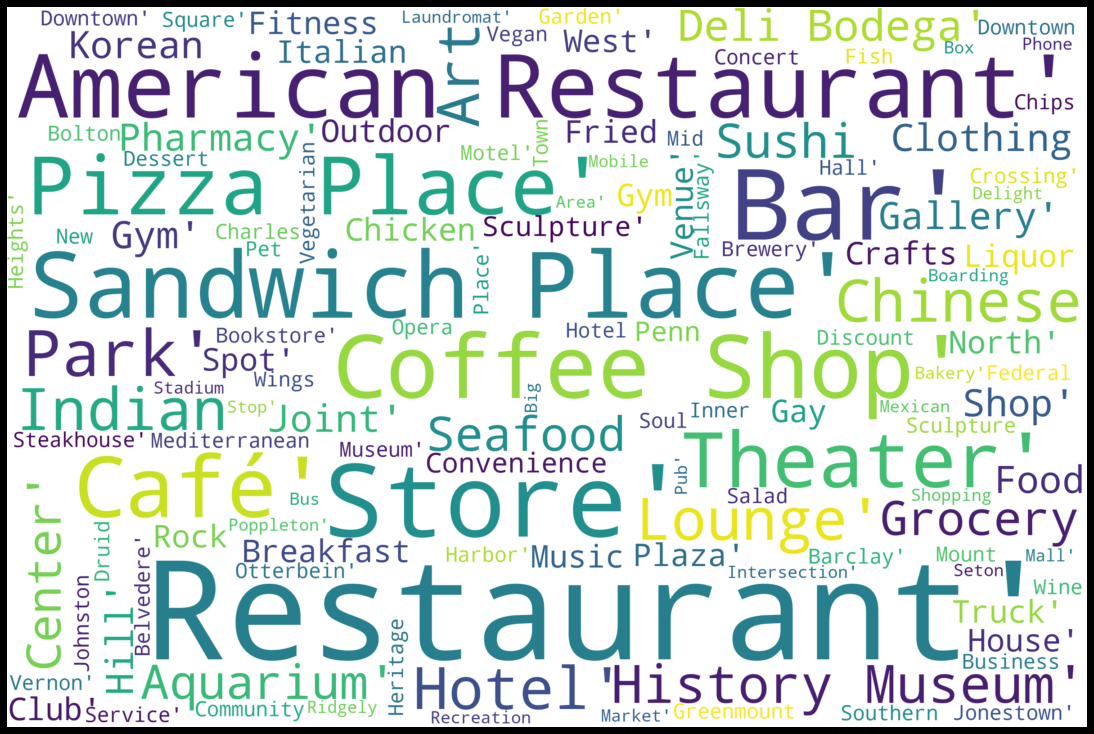

In [22]:
central_cluster0 = central_venues_merged[central_venues_merged['Cluster Labels'] == 0]                                  
central_cloudwords = central_cluster0.values.tolist()

#Creating Cloud Words
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = central_cloudwords
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### *Cloud Words For Western District Good Actors*

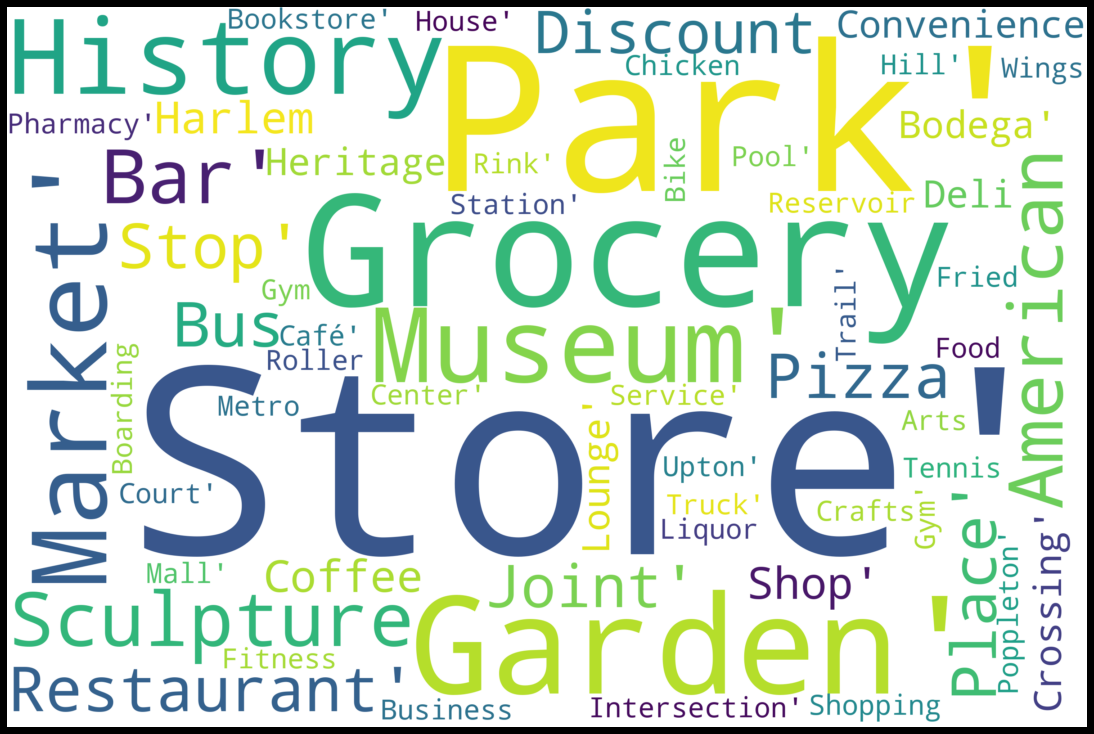

In [23]:
western_cluster2 = western_venues_merged[western_venues_merged['Cluster Labels'] == 2]                                  
western_cloudwords = western_cluster2.values.tolist()

#Creating Cloud Words
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = western_cloudwords
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# *Results*
<strong>*Question to be answer*</strong><br>
 + *Social issue, neighborhood crime, which is co-relate with its neighborhood resources?*
 + *How we could create a better neighborhood by creating a better neighborhood resources in fighting the crime?*<br> 

*The results need to be tested to confirm the model and the hyphothesis is correct. We need to implement the good actors and remove the bad actors in a high crime rate neighborhood for X number of years and to understand whether this will reduce the number of crime incidents.*<br>
*Overall, althought the results provides the good and bad actors in a neighborhood, but, there are also actors that is not the key contributor to the model but more than a side outcome of the bad or good actors. Example, Grocery store might not be the good actor but grocery store with the pattern to be start up at a location with lower crime rate.*<br>
*What could be improve in the dataset would be more variety of venues categories to be included as example: police station, community center, school, and etc, this will helps whether placing a police station will helps in reducing crime incidents or not.*<br>

<strong>*The results could be used by*</strong><br>
 + *Goverment to test the hyphothesis by implement more good actors and reduce bad actors in a high crime incidents neighborhood*
 + *Business to understand the risks and opportunities for them to start their business*
 + *For you to help in refine the model and for a better use of purposes*

# *Discussion*
*These are some of the observations from the project*<br>
 + *The venues categories are limited and some of the categories like goverment building, community centers and etc are explored in using the FourSquare API*
 + *We need to use the right geolocation tool to get a more accurate geolocation information*
 + *We do not have a method to test the number of K to provide me to understand the accuracy of the clusters*

# *Conclusion*
*In conclusion, I am quite happy with the results of the project, and the next steps is to test the hyphothesis using the model and to understand how this model improve and to be more impactful to resolve some of the crime incidents in a neighborhood. I would also like to see other projects that would have the same goal and objective to resolve crime incidents in a neighborhood with a different models and methods. This capstone project helps me to have the capablities to look into more dataset in the future and to resolve more real world issues with real world dataset.*